# Atividade: Efeito da Fase e Sistemas Radar

Aluno: João Mário Carnieletto Izoton lago

### Bibliotecas e Imports

In [1]:
%pip install -q numpy matplotlib scipy pandas


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
from scipy import signal
from scipy.io import loadmat
import matplotlib.pyplot as plt
from numpy.fft import fft as fast_fourier_transform, fftfreq as frequency_values

# Leitura e análise do sinal

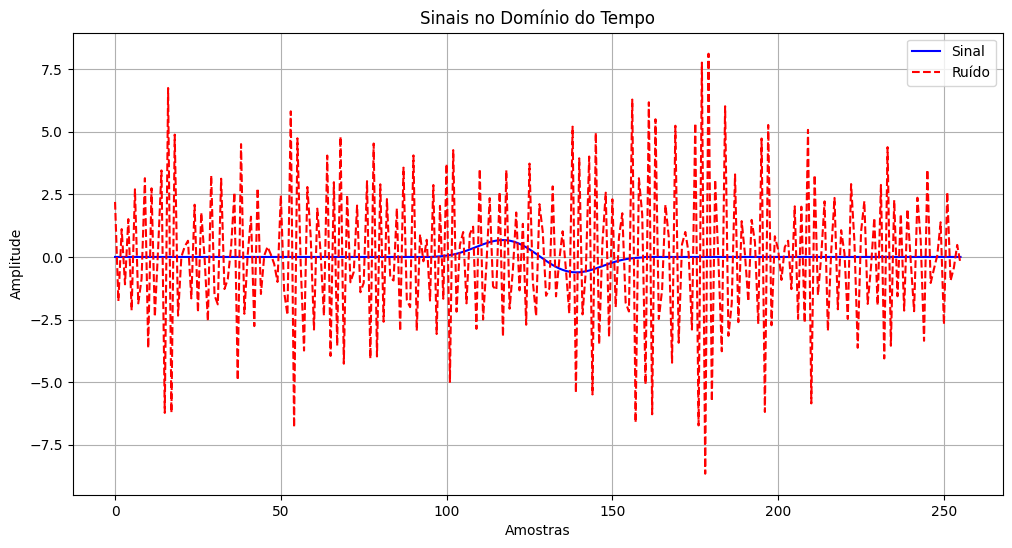

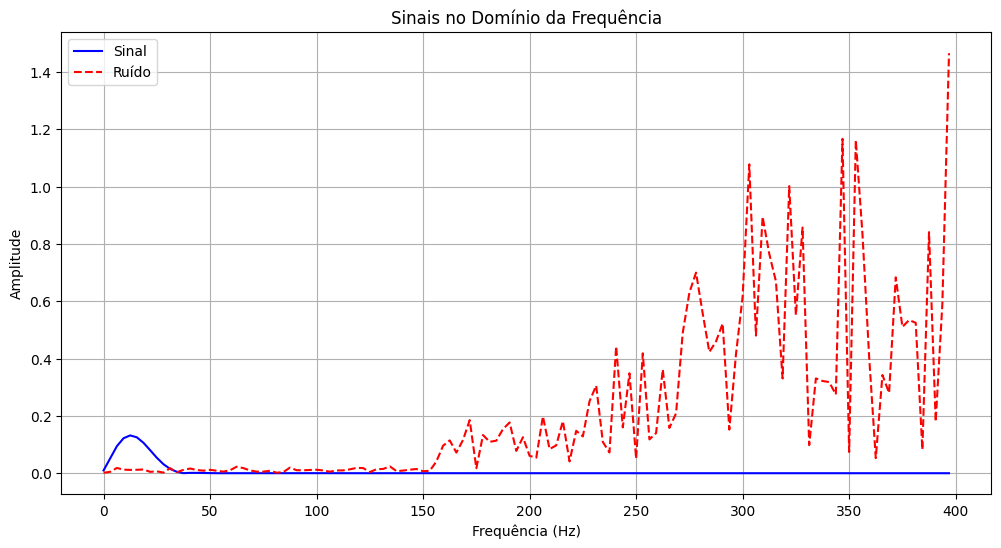

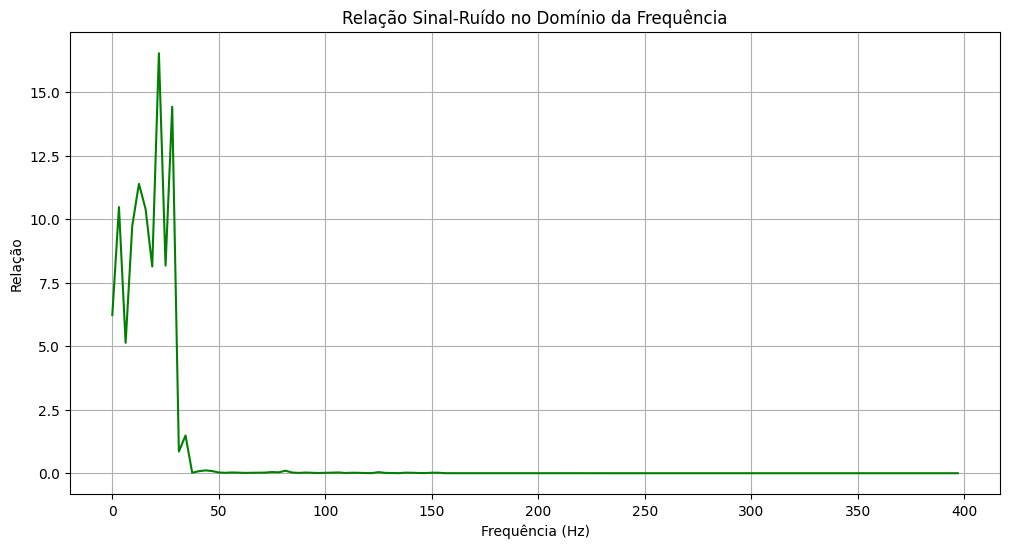

In [3]:
data_mat = loadmat('gdeldata.mat')

signal_data = np.array(data_mat['x1'][0])
noise_data = np.array(data_mat['noise'][0])

plt.figure(figsize=(12, 6))
plt.plot(signal_data, label='Sinal', color='blue', linewidth=1.5)
plt.plot(noise_data, label='Ruído', color='red', linestyle='--', linewidth=1.5)
plt.title('Sinais no Domínio do Tempo')
plt.xlabel('Amostras')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

num_samples = len(signal_data)
sample_interval = 1.0 / 800.0
frequencies = frequency_values(num_samples, sample_interval)[:num_samples // 2]
fft_signal = fast_fourier_transform(signal_data)
fft_noise = fast_fourier_transform(noise_data)

plt.figure(figsize=(12, 6))
plt.plot(frequencies, 2.0 / num_samples * np.abs(fft_signal[0:num_samples // 2]), label='Sinal', color='blue', linewidth=1.5)
plt.plot(frequencies, 2.0 / num_samples * np.abs(fft_noise[0:num_samples // 2]), label='Ruído', color='red', linestyle='--', linewidth=1.5)
plt.title('Sinais no Domínio da Frequência')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

snr_ratio = np.abs(fft_signal) / np.abs(fft_noise)
plt.figure(figsize=(12, 6))
plt.plot(frequencies, snr_ratio[0:num_samples // 2], color='green', linewidth=1.5)
plt.title('Relação Sinal-Ruído no Domínio da Frequência')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Relação')
plt.grid(True)
plt.show()


A relação sinal-ruído é bem alta nas frequências onde o sinal está presente, indicando que o sinal é significativamente mais forte que o ruído, o que torna viável o processo de filtragem do ruído.

# Fase em Filtros FIR e IIR

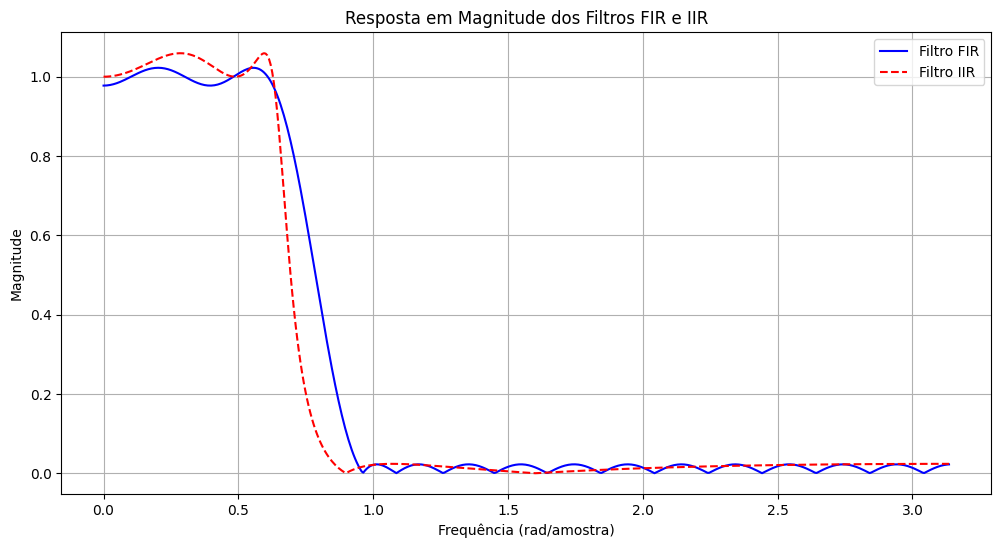

In [4]:
fir_coeffs = np.array(data_mat['h'][0])
iir_coeffs_a = np.array(data_mat['a'][0])
iir_coeffs_b = np.array(data_mat['b'][0])

frequencies, fir_response = signal.freqz(fir_coeffs)
frequencies, iir_response = signal.freqz(iir_coeffs_b, iir_coeffs_a)

plt.figure(figsize=(12, 6))
plt.plot(frequencies, np.abs(fir_response), label='Filtro FIR', color='blue', linewidth=1.5)
plt.plot(frequencies, np.abs(iir_response), label='Filtro IIR', color='red', linestyle='--', linewidth=1.5)
plt.title('Resposta em Magnitude dos Filtros FIR e IIR')
plt.xlabel('Frequência (rad/amostra)')
plt.ylabel('Magnitude')
plt.legend()
plt.grid(True)
plt.show()

A resposta em magnitude dos dois filtros demonstra que ambos são capazes de recuperar o sinal de interesse, pois a resposta em magnitude é alta nas regiões onde o sinal está presente.

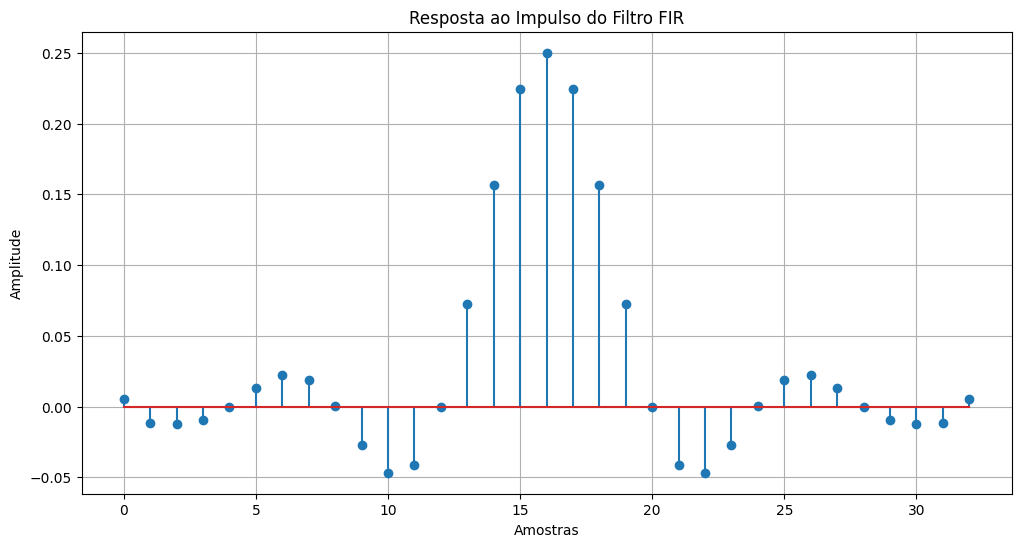

In [5]:
plt.figure(figsize=(12, 6))
plt.stem(fir_coeffs)
plt.title('Resposta ao Impulso do Filtro FIR')
plt.xlabel('Amostras')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

A resposta ao impulso do filtro FIR é simétrica, indicando que o filtro é linear e de fase zero. O atraso de grupo é constante e igual a zero.

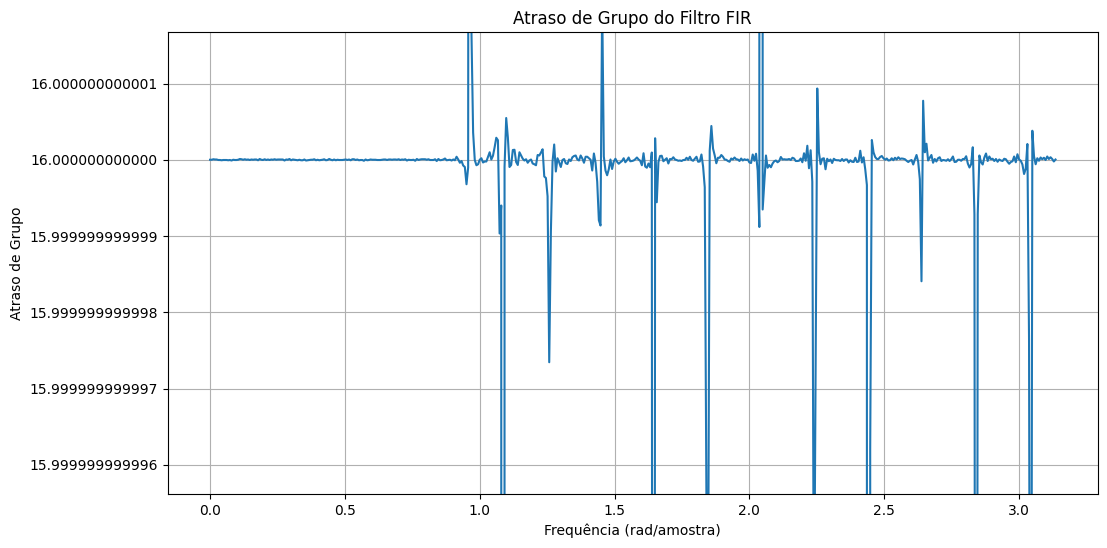

O atraso de grupo médio do filtro FIR é de aproximadamente 16.0.


In [6]:
frequencies_gd, group_delay = signal.group_delay((fir_coeffs, 1))

smoothed_gd = signal.medfilt(group_delay, 3)

max_group_delay = np.max(smoothed_gd)
min_group_delay = np.min(smoothed_gd)

plt.figure(figsize=(12, 6))
plt.plot(frequencies_gd, group_delay)
plt.title('Atraso de Grupo do Filtro FIR')
plt.xlabel('Frequência (rad/amostra)')
plt.ylabel('Atraso de Grupo')
plt.ylim([min_group_delay, max_group_delay])
plt.grid(True)
plt.ticklabel_format(useOffset=False)
plt.show()

# Calcular o atraso de grupo médio
avg_group_delay = np.mean(group_delay)

print(f"O atraso de grupo médio do filtro FIR é de aproximadamente {round(avg_group_delay, 3)}.")

O atraso de grupo do filtro FIR, desconsiderando os glitches, é constante, indicando que o filtro é linear e não introduz distorções de fase.

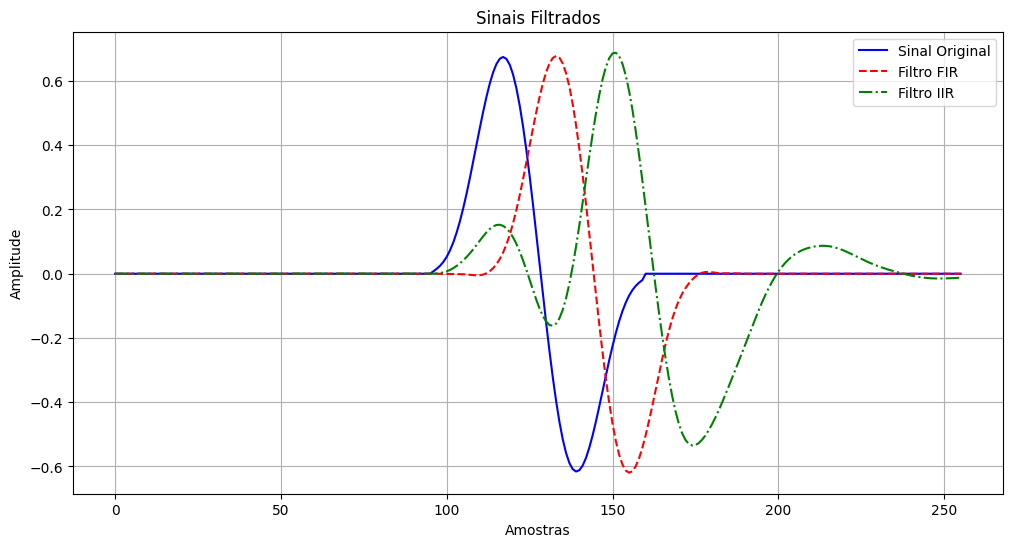

Atraso N 16


In [7]:
filtered_fir = signal.lfilter(fir_coeffs, 1, signal_data)
filtered_iir = signal.lfilter(iir_coeffs_b, iir_coeffs_a, signal_data)

plt.figure(figsize=(12, 6))
plt.plot(signal_data, label='Sinal Original', color='blue', linewidth=1.5)
plt.plot(filtered_fir, label='Filtro FIR', color='red', linestyle='--', linewidth=1.5)
plt.plot(filtered_iir, label='Filtro IIR', color='green', linestyle='-.', linewidth=1.5)
plt.title('Sinais Filtrados')
plt.xlabel('Amostras')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

print(f"Atraso N {round(avg_group_delay)}")

O sinal filtrado com o filtro FIR mantém a forma do sinal original, mas apresenta um atraso de 16 amostras. O sinal filtrado com o filtro IIR, por outro lado, não preserva a forma original e apresenta um atraso maior, devido à distorção de fase causada pelo filtro IIR.

# Distorção de Pulso

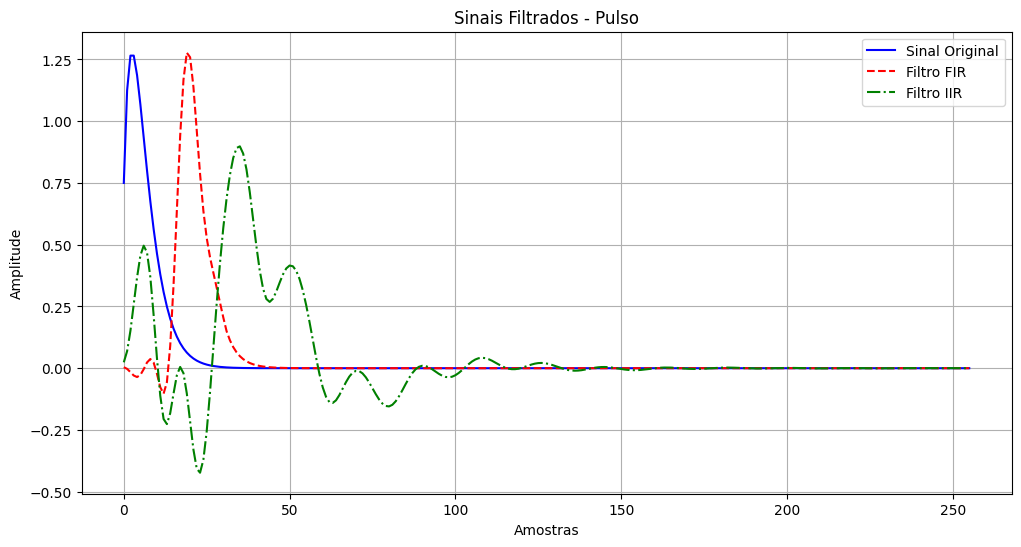

In [8]:
pulse_signal = np.array(data_mat['pulse'][0])

filtered_pulse_fir = signal.lfilter(fir_coeffs, 1, pulse_signal)
filtered_pulse_iir = signal.lfilter(iir_coeffs_b, iir_coeffs_a, pulse_signal)

plt.figure(figsize=(12, 6))
plt.plot(pulse_signal, label='Sinal Original', color='blue', linewidth=1.5)
plt.plot(filtered_pulse_fir, label='Filtro FIR', color='red', linestyle='--', linewidth=1.5)
plt.plot(filtered_pulse_iir, label='Filtro IIR', color='green', linestyle='-.', linewidth=1.5)
plt.title('Sinais Filtrados - Pulso')
plt.xlabel('Amostras')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

O sinal de `pulso` é caracterizado como um sinal de banda larga. Quando ele é processado através do filtro IIR, percebe-se uma forte distorção e espalhamento no tempo. Isso ocorre devido à distorção de fase inerente ao filtro IIR, que causa variações de fase dependentes da frequência, levando ao espalhamento do sinal no domínio do tempo. Por outro lado, o filtro FIR é linear em fase e, portanto, não introduz distorções de fase, mantendo a forma original do sinal, embora com um atraso constante. Esta distorção no filtro IIR é mais perceptível em sinais de maior largura de banda, como o pulso, devido à sua fase dependente da frequência.

# Remoção de Ruído de um Pulso para estimar atraso

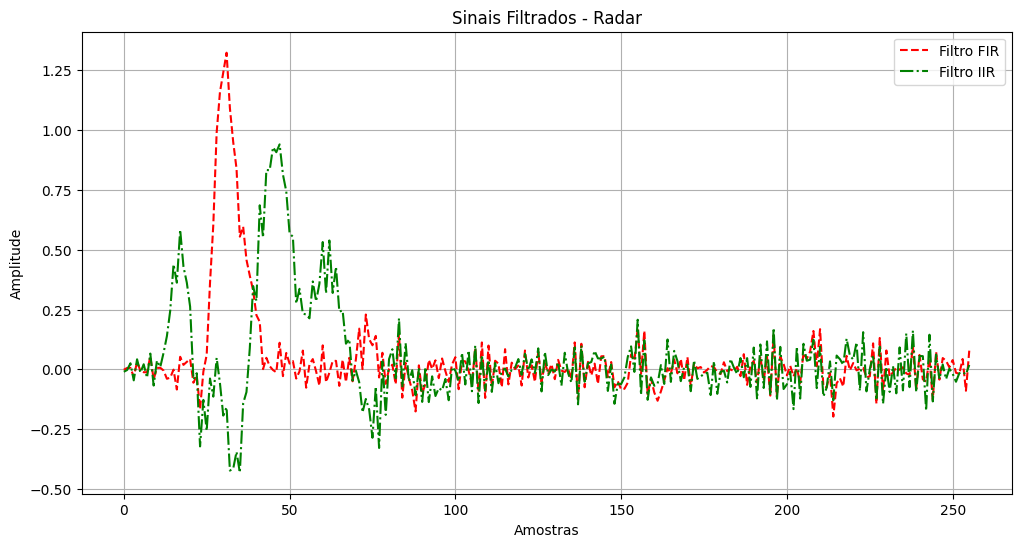

In [9]:
# Extrair o sinal pnd_1 do conjunto de dados
radar_signal = np.array(data_mat['pnd_1'][0])

# Aplicar o filtro FIR ao sinal radar_signal
filtered_radar_fir = signal.lfilter(fir_coeffs, 1, radar_signal)
# Aplicar o filtro IIR ao sinal radar_signal
filtered_radar_iir = signal.lfilter(iir_coeffs_b, iir_coeffs_a, radar_signal)

# Plotar os sinais filtrados
plt.figure(figsize=(12, 6))
plt.plot(filtered_radar_fir, label='Filtro FIR', color='red', linestyle='--', linewidth=1.5)
plt.plot(filtered_radar_iir, label='Filtro IIR', color='green', linestyle='-.', linewidth=1.5)
plt.title('Sinais Filtrados - Radar')
plt.xlabel('Amostras')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


Após a aplicação dos filtros FIR e IIR no sinal de radar, o atraso temporal do pulso pode ser estimado comparando-se o deslocamento do pulso detectado no sinal filtrado em relação ao sinal original. Em geral:

- **Filtro FIR**: O filtro FIR possui uma fase linear, o que significa que ele não distorce o sinal em termos de fase, sendo mais confiável para uma estimativa precisa do atraso.
- **Filtro IIR**: O filtro IIR, por outro lado, pode introduzir distorções de fase, especialmente em frequências mais altas, o que compromete a precisão da estimativa de atraso.

Para a remoção de ruído em sinais de radar e para a estimativa de tempo de atraso, o **filtro FIR** é preferido devido à sua preservação da fase e maior precisão na reconstrução do sinal. Embora o filtro IIR seja eficiente em outros aspectos, ele pode causar distorções de fase, tornando-o menos adequado para aplicações que exigem uma alta precisão na estimativa de tempo de atraso.

Como as aplicações de radar requerem uma estimativa precisa de tempo de atraso, o **filtro FIR** é geralmente a escolha mais apropriada para essas situações.